In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42) 

# Exploratory Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir = '/content/drive/MyDrive/Work/Omdena/Ethiopia NLP/project/NLP-for-Ethiopian-languages-2023/data/'

In [4]:
path = dir + 'Amharic News Dataset.csv'
data = pd.read_csv(path)

data = shuffle(data)
data.head()

,headline,category,date,views,article,link
44810,በመዲናዋ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና ለማስጀመር የ20 ቢሊ...,ፖለቲካ,"September 14, 2017",Unknown,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,https://waltainfo.com/am/29360/
18329,አሸንዳ፣ ሻደይ፣ አሸንድዬ፣ ሶለል፣ ማሪያና ዓይኒ ዋሪ በዓል በዩኔስኮ አ...,ሀገር አቀፍ ዜና,"Jan 8, 2020",387,አዲስ አበባ፣ ታህሳስ 29፣ 2012 (ኤፍ.ቢ.ሲ) የአሸንዳ፣ ሻደይ፣ አሸ...,https://www.fanabc.com/%e1%8b%a8%e1%8a%a0%e1%8...
17644,ግምታዊ ዋጋቸው ከ31 ነጥብ 6 ሚሊየን ብር በላይ የሆኑ የኮንትሮባንድ ዕ...,ሀገር አቀፍ ዜና,"Mar 4, 2020",634,አዲስ አበባ ፣ የካቲት 25 ፣ 2012 (ኤፍ ቢ ሲ) ባለፉት አምስት ቀና...,https://www.fanabc.com/%e1%8c%8d%e1%88%9d%e1%8...
32773,​ባምላክ ተሰማ የዓለም ዋንጫ ለመምራት እጩ ከሆኑ ዳኞች ውስጥ ተካተተ,ስፖርት,"November 19, 2017",Unknown,ሩሲያ በ2018 ለምታስተናግደው የዓለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,https://soccerethiopia.net/football/31318
4139,“መንገድ ለሰው” መርሐ ግብር በየሳምንቱ እንደሚካሄድ ተገለፀ,ሀገር አቀፍ ዜና,"August 7, 2019",32,አዲስ አበባ፤- “መንገድ ለሰው” በሚል በአዲስ አበባ ከተማ ሲካሄድ የነ...,https://www.press.et/Ama/?p=15606


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


In [6]:
data.category.value_counts()

ሀገር አቀፍ ዜና    20674
ስፖርት          10411
ፖለቲካ           9325
ዓለም አቀፍ ዜና     6543
ቢዝነስ           3894
መዝናኛ            635
Name: category, dtype: int64

In [7]:
data.category.unique()

array(['ፖለቲካ', 'ሀገር አቀፍ ዜና', 'ስፖርት', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'መዝናኛ', nan],
      dtype=object)

Those are:

['Politics', 'Local News', 'Sports', 'International News', 'Business', 'Entertainment']

In [8]:
df = data.copy()
d_replace = {'ፖለቲካ':'Politics', 'ሀገር አቀፍ ዜና':'Local News', 'ስፖርት':'Sports', 'ዓለም አቀፍ ዜና':'International News', 'ቢዝነስ':'Business', 'መዝናኛ':'Entertainment', np.nan:'Others'}
df.category = df.category.map(d_replace)
df.sample(10)

,headline,category,date,views,article,link
28745,ሪፖርት | ኢትዮጵያ ቡና ከድንቅ እንቅስቃሴ ጋር የዓመቱን የመጀመርያ ድል...,Sports,"December 22, 2019",Unknown,በርከት ያሉ የግብ ማግባት ሙከራዎች በተስተናገዱበት የ4ኛ ሳምንት የኢትዮ...,https://soccerethiopia.net/football/53248
34387,ኢትዮጵያ ንግድ ባንክ ከ ቅዱስ ጊዮርጊስ – ቀጥታ የፅሁፍ ስርጭት,Sports,"June 14, 2016",Unknown,\n72′ ተስፋዬ አለባቸው\nመደበኛው የጨዋታ ክፍለ ጊዜ ተጠናቆ 4 ደቂቃ...,https://soccerethiopia.net/football/12693
12232,የድምጻዊ ሃጫሉ ሁንዴሳ የቀብር ሥነ ሥርዓት አምቦ ውስጥ ተፈጸመ,Local News,2 ሀምሌ 2020,Unknown,የድምጻዊ ሃጫሉ ሁንዴሳ የቀብር ሥነ ሥርዓት በአምቦ ከተማ በሚገኘው የገዳ...,https://www.bbc.com/amharic/news-53260523
21064,የኮሮና ቫይረስ ማረጋገጫ ምርመራ በአገር ውስጥ ተጀመረ,Local News,12 February 2020,Unknown,የኖቭል ኮሮና ቫይረስ ማረጋገጫ ኬሚካል (ሪኤጀንት) ማስገባቱንና ምርመራ ...,https://www.ethiopianreporter.com/article/18005
11626,“የዋጋ ንረቱ መፍትሔ ሊፈለግለት ይገባል” ሸማቾች,Local News,"September 12, 2019",155,“የዋጋ ንረቱ መፍትሔ ሊፈለግለት ይገባል” ሸማቾችህጋዊ የንግድ ስርዓቱን ...,https://www.amharaweb.com/%e1%8b%a8%e1%8b%8b%e...
20287,መከላከያ ሚኒስቴር አቶ ስብሃት ነጋ ከእነ ባለቤታቸው በቁጥጥር ሥር መዋላ...,Politics,10 January 2021,Unknown,ሕወሓት በ1967 ዓ.ም. ሲመሠረት አንደኛው መሥራችና ከፍተኛ አመራር የነ...,https://www.ethiopianreporter.com/article/20968
51418,ሳዑዲ አረቢያ ሴቶች ያለማንም ረዳት እንዲጓዙ ፈቀደች,Local News,"August 2, 2019",Unknown,ባለፈው አርብ ይፋ የተደረገው አዲሱ ሕግ፤ እድሜያቸው ...,https://waltainfo.com/am/34122/
28069,“ቡድኑን በአንበልነት መምራቴ እና በቡና መለያ የመጀመርያ ሐት-ትሪክ መስ...,Sports,"March 7, 2020",Unknown,አቡበከር ናስር በኢትዮጵያ ቡና መለያ የመጀመርያውን ሐት-ትሪክ ስለመስራቱ...,https://soccerethiopia.net/football/57061
15417,የውጭ ጉዳይ ሚኒስትር ዴኤታ አምባሳደር ሬድዋን ሁሴን ከፖርቹጋል አቻቸው ...,Local News,"Sep 14, 2020",190,አዲስ አበባ፣ መስከረም 4፣ 2013 (ኤፍ.ቢ.ሲ) የኢፌዲሪ የውጭ ጉዳይ ...,https://www.fanabc.com/%e1%8b%a8%e1%8b%8d%e1%8...
34973,ሽመልስ በቀለ በፔትሮጀት የመሰለፍ ዕድል ተነፍጎታል,Sports,"January 17, 2016",Unknown,ከሃገር ውጪ ለሚጫወቱ ኢትዮጵያዊያን ተጫዋቾችን የውድድር ዘመኑ የሚመች ...,https://soccerethiopia.net/football/4952


In [9]:
cat_labels = df.category.unique()
cat_labels

array(['Politics', 'Local News', 'Sports', 'International News',
       'Business', 'Entertainment', 'Others'], dtype=object)

In [10]:
data = df.copy()    # back to normal dataframe

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51483 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


In [12]:
data.isna().sum()

headline    13
category     0
date         0
views        0
article      0
link         0
dtype: int64

In [13]:
# data = data.dropna(subset=['article'])

In [14]:
data.category.value_counts()

Local News            20674
Sports                10411
Politics               9325
International News     6543
Business               3894
Entertainment           635
Others                    1
Name: category, dtype: int64

In [15]:
data['link'].value_counts()

https://amharic.voanews.com//a/amb-tibor-nagy-in-addis-ababa-on-sudan-06-14-19/4960197.html                                                                                                                                                                                                                                                 3
https://amharic.voanews.com//a/covid-africa/5535902.html                                                                                                                                                                                                                                                                                    3
https://amharic.voanews.com//a/looking-ahead-Ethiopian-renaissance-dam-weaspire-with-voa-alula-kebede-june-2020/5470822.html                                                                                                                                                                                                                

In [16]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,headline,category,date,views,article,link,word_len
44810,በመዲናዋ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና ለማስጀመር የ20 ቢሊ...,Politics,"September 14, 2017",Unknown,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,https://waltainfo.com/am/29360/,302
18329,አሸንዳ፣ ሻደይ፣ አሸንድዬ፣ ሶለል፣ ማሪያና ዓይኒ ዋሪ በዓል በዩኔስኮ አ...,Local News,"Jan 8, 2020",387,አዲስ አበባ፣ ታህሳስ 29፣ 2012 (ኤፍ.ቢ.ሲ) የአሸንዳ፣ ሻደይ፣ አሸ...,https://www.fanabc.com/%e1%8b%a8%e1%8a%a0%e1%8...,165
17644,ግምታዊ ዋጋቸው ከ31 ነጥብ 6 ሚሊየን ብር በላይ የሆኑ የኮንትሮባንድ ዕ...,Local News,"Mar 4, 2020",634,አዲስ አበባ ፣ የካቲት 25 ፣ 2012 (ኤፍ ቢ ሲ) ባለፉት አምስት ቀና...,https://www.fanabc.com/%e1%8c%8d%e1%88%9d%e1%8...,102
32773,​ባምላክ ተሰማ የዓለም ዋንጫ ለመምራት እጩ ከሆኑ ዳኞች ውስጥ ተካተተ,Sports,"November 19, 2017",Unknown,ሩሲያ በ2018 ለምታስተናግደው የዓለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,https://soccerethiopia.net/football/31318,143
4139,“መንገድ ለሰው” መርሐ ግብር በየሳምንቱ እንደሚካሄድ ተገለፀ,Local News,"August 7, 2019",32,አዲስ አበባ፤- “መንገድ ለሰው” በሚል በአዲስ አበባ ከተማ ሲካሄድ የነ...,https://www.press.et/Ama/?p=15606,193


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51483 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
 6   word_len  51483 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [18]:
data.word_len.mean()

248.9586853912942

# character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ' 

In [19]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
    return rep48


In [20]:
data['article'] = data['article'].str.replace(r'[^\w\s]','')

In [21]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

In [22]:
n_data = data[['article','category']]
n_data.head()


,article,category
44810,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,Politics
18329,አዲስ አበባ ታህሳስ 29 2012 ኤፍቢሲ የአሸንዳ ሻደይ አሸንድዬ ሶለል ...,Local News
17644,አዲስ አበባ የካቲት 25 2012 ኤፍ ቢ ሲ ባለፉት አምስት ቀናት ግም...,Local News
32773,ሩሲያ በ2018 ለምታስተናግደው የአለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,Sports
4139,አዲስ አበባ መንገድ ለሰው በሚል በአዲስ አበባ ከተማ ሲካሄድ የነበረው ...,Local News


In [23]:
text,label = data['article'].values , data['category'].values

In [24]:
# n_data.head(5).to_csv('table.csv')

## Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [26]:
def print_eval(title, model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import confusion_matrix, classification_report

    print(title)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))

    print("Test_Set")
    print(classification_report(y_test, y_pred)) #, target_names=cat_labels))

    print("Train_Set")
    print(classification_report(y_train, y_pred_train)) #, target_names=cat_labels))
    

# Count Vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['Politics', 'Local News', 'Local News', ..., 'Local News',
        'Sports', 'Local News'], dtype=object))

In [28]:
# unique_label = list(set(label))
# Y= []
# for i in label:
#     Y.append(unique_label.index(i))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6279498883169855

In [31]:
print_eval('GaussianNB', classifier, X_train, X_test, y_train, y_test)

GaussianNB
[[ 580   10   61   84   11   55    1]
 [   8  103    7    3    0    2    4]
 [  19   23 1187   32   10   42   10]
 [ 641  175 1000 1591   33  579   53]
 [   0    0    0    0    0    0    0]
 [ 234   26  329  219   23 1044    3]
 [   3   26   49   18   36    2 1961]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.39      0.72      0.51       802
     Entertainment       0.28      0.81      0.42       127
International News       0.45      0.90      0.60      1323
        Local News       0.82      0.39      0.53      4072
            Others       0.00      0.00      0.00         0
          Politics       0.61      0.56      0.58      1878
            Sports       0.97      0.94      0.95      2095

          accuracy                           0.63     10297
         macro avg       0.50      0.62      0.51     10297
      weighted avg       0.72      0.63      0.63     10297

Train_Set
                    precision    recall 

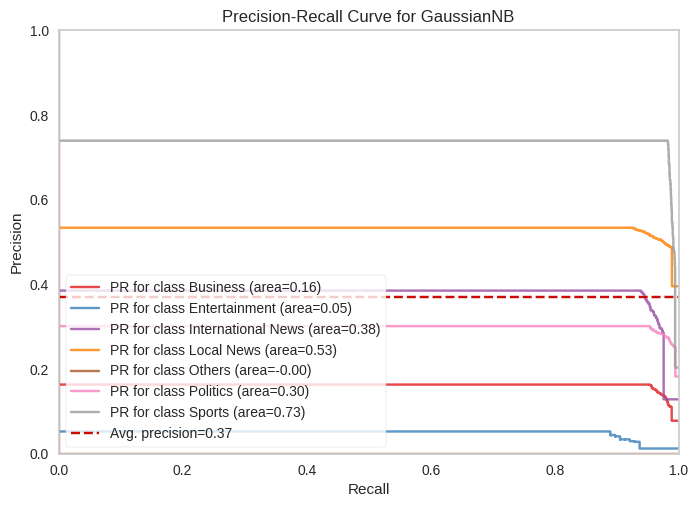

In [32]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
# store_models = {}
# def store_model(title, model, visualizer=viz, storage:dict):
#   storage[title] = {}
#   storage[title]['model'] = model
#   storage[title]['visualizer'] = 

In [33]:
store_models = {}
store_models["GaussianNB"] = {}
store_models["GaussianNB"]['model'] = classifier
store_models["GaussianNB"]['visualizer'] = viz

## Multinomial NB

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=3)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7069049237642032

In [35]:
print_eval('Multinomial NB', classifier, X_train, X_test, y_train, y_test)

Multinomial NB
[[ 564   15   19  137    0   67    0]
 [   3  114    2    7    0    1    0]
 [  50   28  998  118    1  108   20]
 [ 414  135  262 2533    0  705   23]
 [   0    0    0    0    0    0    0]
 [ 184   28  222  303    1 1138    2]
 [  10   26   17   97    0   13 1932]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.46      0.70      0.56       802
     Entertainment       0.33      0.90      0.48       127
International News       0.66      0.75      0.70      1323
        Local News       0.79      0.62      0.70      4072
            Others       0.00      0.00      0.00         0
          Politics       0.56      0.61      0.58      1878
            Sports       0.98      0.92      0.95      2095

          accuracy                           0.71     10297
         macro avg       0.54      0.64      0.57     10297
      weighted avg       0.74      0.71      0.71     10297

Train_Set
                    precision    rec

In [36]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = ['Politics']
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = MultinomialNB(alpha=3)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

In [37]:
classifier.classes_

array(['Business', 'Entertainment', 'International News', 'Local News',
       'Others', 'Politics', 'Sports'], dtype='<U18')

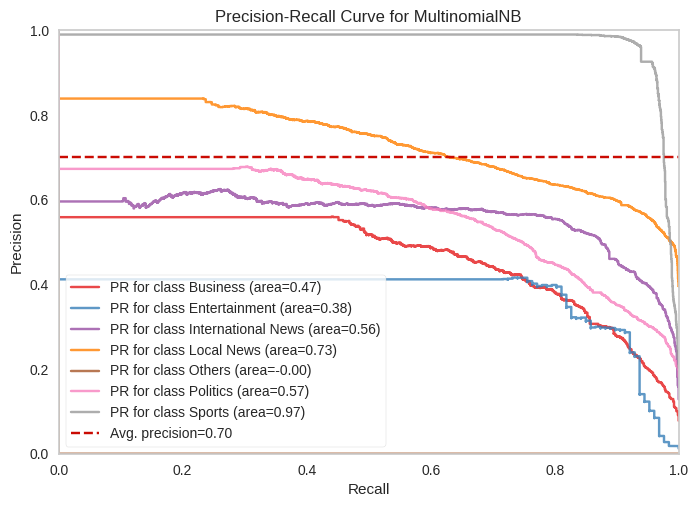

In [38]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

In [39]:
store_models["Multinomial NB"] = {}
store_models["Multinomial NB"]['model'] = classifier
store_models["Multinomial NB"]['visualizer'] = viz

# TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
X, Y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['Politics', 'Local News', 'Local News', ..., 'Local News',
        'Sports', 'Local News'], dtype=object))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6222200640963388

In [43]:
print_eval("Gaussian NB TF-iDF", classifier,X_train, X_test, y_train, y_test)

Gaussian NB TF-iDF
[[ 656   15   12   35   11   73    0]
 [   6  106    8    3    0    3    1]
 [  69   64  996   51   10  118   15]
 [ 984  172  386 1411   33 1066   20]
 [   0    0    0    0    0    0    0]
 [ 309   24  197   56   23 1265    4]
 [   5   20   26   32   36    3 1973]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.32      0.82      0.46       802
     Entertainment       0.26      0.83      0.40       127
International News       0.61      0.75      0.68      1323
        Local News       0.89      0.35      0.50      4072
            Others       0.00      0.00      0.00         0
          Politics       0.50      0.67      0.57      1878
            Sports       0.98      0.94      0.96      2095

          accuracy                           0.62     10297
         macro avg       0.51      0.62      0.51     10297
      weighted avg       0.75      0.62      0.63     10297

Train_Set
                    precision   

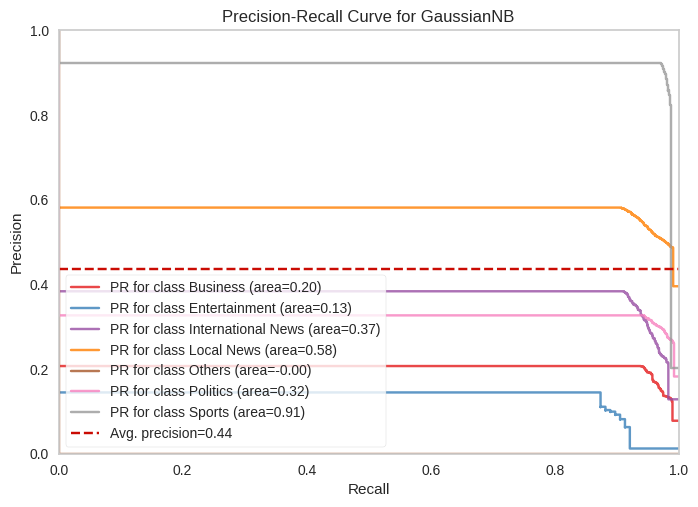

In [44]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

In [45]:
store_models["Gaussian NB TF-iDF"] = {}
store_models["Gaussian NB TF-iDF"]['model'] = classifier
store_models["Gaussian NB TF-iDF"]['visualizer'] = viz

# Models Comparison

In [ ]:
feature = 'Business'
for method in store_models.keys():
  classifier = store_models[method]['model']
  viz = store_models[method]['visualizer']
  y_pred = classifier.predict(X_test)
  recall_ = recall_score(y_test, y_pred, labels = [feature], average = None)
  f1_ = f1_score(y_test, y_pred, labels = [feature], average = None)
  AP_ = viz.score_[feature]